In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import itertools
from tqdm import tqdm

### Question 7

In [ ]:
alpha_df = pd.read_csv('MFE230G Homework 1 Problem 7.csv')
alpha_df

Ticker                   Company Name    Aug-17    Sep-17    Oct-17  \
0      MMM                          3M Co  0.012881  0.005603 -0.000463   
1      ACE                    ACE Limited -0.012554 -0.008816 -0.009450   
2      ABT            Abbott Laboratories  0.003400  0.004170  0.005227   
3      ANF  Abercrombie & Fitch Company A -0.007918 -0.006269 -0.006909   
4     ADBE              Adobe Systems Inc  0.016936  0.013437  0.009025   
..     ...                            ...       ...       ...       ...   
495     XL                     XL Capital -0.000088 -0.000534  0.001849   
496   YHOO                     Yahoo Inc.  0.023525  0.028039  0.026431   
497    YUM                Yum! Brands Inc -0.019719 -0.015459 -0.018412   
498    ZMH                Zimmer Holdings -0.001426 -0.001414 -0.000335   
499   ZION                  Zions Bancorp -0.004343 -0.005288 -0.004162   

       Nov-17    Dec-17    Jan-18    Feb-18    Mar-18    Apr-18    May-18  \
0   -0.000231 -0.001994 -0.006839 -0.006922 -0.003215 -0.004470 -0.006455   
1   -0.009577 -0.010287 -0.005816 -0.004801 -0.003840 -0.004686 -0.003654   
2    0.005499  0.003394  0.003929  0.002532  0.000290 -0.001715 -0.001931   
3   -0.004566 -0.002725 -0.003648 -0.006155 -0.003991 -0.007134 -0.006860   
4    0.000653 -0.000288 -0.005950 -0.009479 -0.009820 -0.005561  0.001142   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.000403 -0.005809 -0.008653 -0.010909 -0.006772 -0.001139  0.001362   
496  0.022577  0.026554  0.019536  0.019074  0.017685  0.015177  0.012641   
497 -0.017882 -0.014096 -0.009348 -0.008356 -0.009718 -0.010696 -0.009373   
498 -0.002870 -0.000269  0.000549 -0.006302 -0.009321 -0.007499 -0.009378   
499 -0.004950 -0.003829 -0.003650 -0.000498 -0.006125 -0.009427 -0.002665   

       Jun-18    Jul-18  
0   -0.010751 -0.014697  
1   -0.012627 -0.012412  
2   -0.002531 -0.001997  
3   -0.005244 -0.003229  
4    0.007562 -0.000574  
..        ...       ...  
495  0.002843  0.002246  
496  0.012592  0.013563  
497 -0.013146 -0.011628  
498 -0.009651 -0.009613  
499 -0.002070 -0.002361  

[500 rows x 14 columns]

In [ ]:
alpha_df.head(10)

Ticker                   Company Name    Aug-17    Sep-17    Oct-17  \
0    MMM                          3M Co  0.012881  0.005603 -0.000463   
1    ACE                    ACE Limited -0.012554 -0.008816 -0.009450   
2    ABT            Abbott Laboratories  0.003400  0.004170  0.005227   
3    ANF  Abercrombie & Fitch Company A -0.007918 -0.006269 -0.006909   
4   ADBE              Adobe Systems Inc  0.016936  0.013437  0.009025   
5    AMD         Advanced Micro Devices -0.011350 -0.012273 -0.012669   
6    AES                       AES Corp  0.009407  0.009705  0.016418   
7    AET                      Aetna Inc  0.012960  0.004275 -0.001550   
8    AFL                      AFLAC Inc -0.018018 -0.013538 -0.016693   
9      A       Agilent Technologies Inc -0.016296 -0.011134 -0.014130   

     Nov-17    Dec-17    Jan-18    Feb-18    Mar-18    Apr-18    May-18  \
0 -0.000231 -0.001994 -0.006839 -0.006922 -0.003215 -0.004470 -0.006455   
1 -0.009577 -0.010287 -0.005816 -0.004801 -0.003840 -0.004686 -0.003654   
2  0.005499  0.003394  0.003929  0.002532  0.000290 -0.001715 -0.001931   
3 -0.004566 -0.002725 -0.003648 -0.006155 -0.003991 -0.007134 -0.006860   
4  0.000653 -0.000288 -0.005950 -0.009479 -0.009820 -0.005561  0.001142   
5 -0.012424 -0.006860 -0.008637 -0.003834 -0.000391 -0.002259 -0.005285   
6  0.018432  0.013638  0.011036  0.011213  0.010360  0.006918  0.010478   
7 -0.005058 -0.002691 -0.012473 -0.010231 -0.008238 -0.007144 -0.007490   
8 -0.013799 -0.012630 -0.010245 -0.011902 -0.016894 -0.013121 -0.018222   
9 -0.008124 -0.009294 -0.006892 -0.006839 -0.006731 -0.006760 -0.001820   

     Jun-18    Jul-18  
0 -0.010751 -0.014697  
1 -0.012627 -0.012412  
2 -0.002531 -0.001997  
3 -0.005244 -0.003229  
4  0.007562 -0.000574  
5 -0.005686 -0.001137  
6  0.018075  0.014414  
7 -0.010182 -0.012789  
8 -0.011161 -0.009757  
9  0.004108  0.006251

#### a)

In [ ]:
alpha_avg_dict = {alpha_df.columns[i] : np.mean(alpha_df.iloc[:, i]) for i in range(2, len(alpha_df.columns))}

In [ ]:
alpha_avg_dict

{'Aug-17': -0.00011236200000000037,
 'Sep-17': -3.876999999999976e-05,
 'Oct-17': -3.353399999999988e-05,
 'Nov-17': -0.00025400600000000003,
 'Dec-17': -0.0003112919999999999,
 'Jan-18': -0.000260468,
 'Feb-18': -0.0005169600000000002,
 'Mar-18': -0.0006534820000000003,
 'Apr-18': -0.0006627299999999999,
 'May-18': -0.0009103919999999995,
 'Jun-18': -0.0007563380000000005,
 'Jul-18': -0.0007071839999999995}

In [ ]:
alpha_std_dict = {alpha_df.columns[i] : np.std(alpha_df.iloc[:, i]) for i in range(2, len(alpha_df.columns))}

In [ ]:
alpha_std_dict

{'Aug-17': 0.010634040461412399,
 'Sep-17': 0.010507916831851118,
 'Oct-17': 0.010382734818189476,
 'Nov-17': 0.010234844269941968,
 'Dec-17': 0.010489942095108815,
 'Jan-18': 0.010221884914876321,
 'Feb-18': 0.010207001461467512,
 'Mar-18': 0.010208474586032723,
 'Apr-18': 0.010332754049772973,
 'May-18': 0.010536500929926218,
 'Jun-18': 0.010519485133396783,
 'Jul-18': 0.010670489112039052}

In [ ]:
alpha_avg_list = [alpha_avg_dict[key] for key in alpha_avg_dict.keys()]

#### b)

In [ ]:
model = ARIMA(alpha_avg_list, order = (1, 0, 0))
res = model.fit()
res.summary()

C:\Users\neilk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:                     ARMA(1, 0)   Log Likelihood                  88.660
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sun, 22 Aug 2021   AIC                           -171.320
Time:                        18:45:06   BIC                           -169.865
Sample:                             0   HQIC                          -171.858
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.000     -1.884      0.060      -0.001    1.69e-05
ar.L1.y        0.8771      0.117      7.490      0.000       0.648       1.107
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1402           +0.0000j            1.1402            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
eps = res.params[0]
coef = res.params[1]

Text(0.5, 1.0, 'AR1 of Cross-Sectional Average of Alphas')

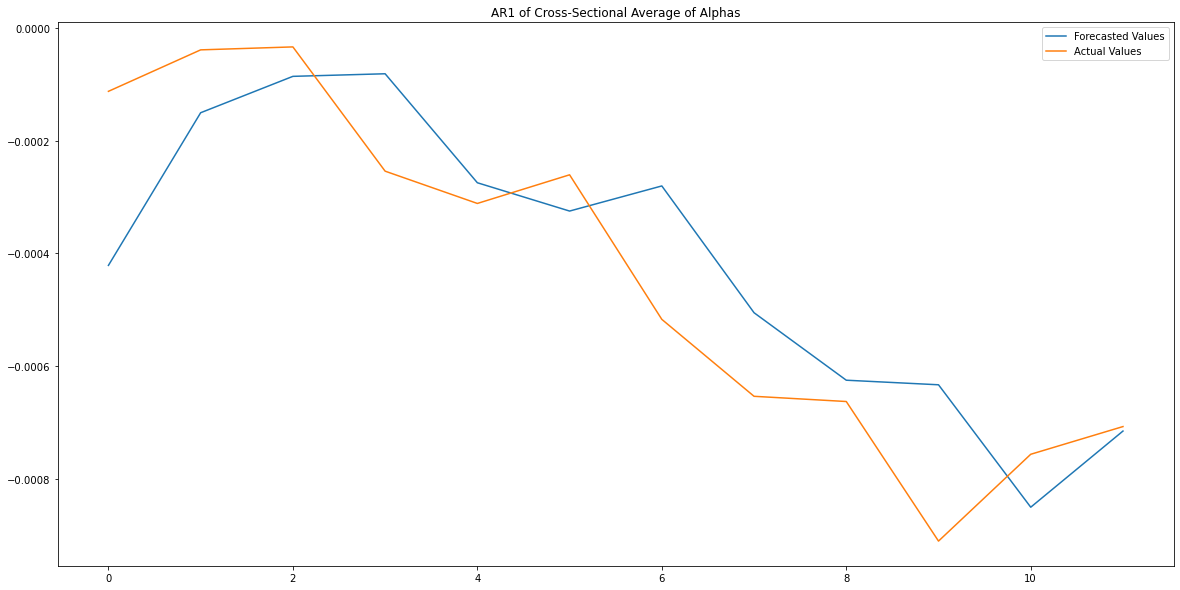

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax.plot(pred, label = 'Forecasted Values')
ax.plot(alpha_avg_list, label = 'Actual Values')
ax.legend(loc = 'best')
ax.set_title('AR1 of Cross-Sectional Average of Alphas')

In [ ]:
gamma = np.log(coef) * (-1)
breadth = 12 * gamma
breadth

1.573927654745948

### Question 8

In [ ]:
#Find all weighting combinations for given num_assets and step_size
def find_weight_combo(step_size, num_assets):
    
    weight_arr = np.arange(0, 1.05, step_size)

    result = [seq for seq in itertools.combinations_with_replacement(weight_arr, num_assets) if sum(seq) == 1.0]
    
    equal_weighting = tuple([(1 / num_assets) for i in range(num_assets)])
    
    result.append(equal_weighting)
    
    return result
                        
    

In [ ]:
#Simulate PF variance and find minimum variance and the corresponding weights
def find_min_active_risk(step_size, num_assets, active_risk):
    
    #Define Covariance Matrix
    #Since returns are uncorrelated, off-diagonal elements are 0
    diag_arr = [(active_risk ** 2)] * num_assets
    V = np.diag(diag_arr)

    #Define Weighting Combinations
    weight_tuples = find_weight_combo(step_size, num_assets)
    
    min_weights = (2, 2, 2)
    min_var = 1000000000
    
    index_arr = []
    pf_var_arr = []
    
    idx = 0
    
    for weight_combo in tqdm(weight_tuples):
        
        index_arr.append(idx)
        idx = idx + 1
        
        h = np.array([weight_combo[i] for i in range(num_assets)])
        pf_active_risk = h.transpose() @ V @ h
        pf_var_arr.append(np.sqrt(pf_active_risk))
        
        
        if (pf_active_risk < min_var):
            
            min_var = pf_active_risk
            min_weights = weight_combo
    
    print('\nNumber of Assets: ' + str(num_assets))
    print('Minimum Active Risk of: ' + str(np.sqrt(min_var)) + ' with weights of ' + str(min_weights))
    return index_arr, pf_var_arr
    
    

In [ ]:
fig, ax = plt.subplots(5, 1, figsize = (36, 18))

for i in range(0, 5):
    temp_idx, temp_pf_var = find_min_active_risk(0.05, i+1, 0.25)
    ax[i].plot(temp_idx, temp_pf_var, label = 'Variance with Various Weightings')
    ax[i].set_title('Number of Assets: ' + str(i + 1))

    

NameError: ignored

#### In the charts above, I placed the equal-weighted portfolio at the very end, and we can visually see that it is the minimum variance for the portfolio. Additionally, the printed statement above the graphs confirms this. The reason for the period nature of the above graphs is that the simulation uses all possible weightings and, for example, (0.8, 0.2) and (0.2, 0.8) would both run in the 2x2 case. Since all stocks have the same active risk then these two weightings would yield the same variance.

#### The brute-force code I wrote would take too long to run for 20 assets, but assuming the same pattern continues the minimum variance portfolio would have weights (1/20) for each asset. The variance of this portfolio is: 

In [ ]:
h = np.array([1/20] * 20)
diag_arr = [(0.25 ** 2)] * 20
V = np.diag(diag_arr)
asset_20_var = h.transpose() @ V @ h
print('Minimum Active Risk: ' + str(asset_20_var))

#### The active risk would increase if we had 25% active risk for all assets but had unequal weightings, as is demonstrated in the graphs above. 

### Question 9

In [ ]:
factor_cov_df = pd.read_csv('Factor Covariance Matrix-0712.csv')
asset_data_df = pd.read_csv('US Asset Data-0712-parse.csv')

In [ ]:
factor_cov_df = factor_cov_df.set_index(factor_cov_df.columns[0])
factor_cov_df.head()

### a)
#### It appears to be monthly percentage. What leads me to this conclusion is the yield column appears to be monthly yields in price. 

### b)

In [ ]:
asset_data_df.head()

TICKER                         NAME   SRISL  VOLTILTY  MOMENTUM   SIZE  \
0   EBAY                     EBAY INC  21.840     0.480     0.478  0.395   
1    NYX                NYSE EURONEXT  19.962     0.246    -1.372 -1.235   
2    ANR  ALPHA NATURAL RESOURCES INC  51.005     3.743    -3.915 -2.307   
3    CBG               CBRE GROUP INC  29.419     1.530    -1.296 -1.411   
4    HSP                  HOSPIRA INC  20.959     0.521    -1.355 -1.325   

   SIZENONL  TRADEACT  GROWTH  EARNYLD  ...  BANKS  THRIFTS  SECASSET  \
0     0.113    -0.455   0.327   -0.259  ...      0        0         0   
1    -0.053     0.780   0.281    0.196  ...      0        0       100   
2    -0.943     1.654   0.831   -4.787  ...      0        0         0   
3    -0.133     0.944  -0.327   -0.229  ...      0        0        16   
4    -0.091     0.001  -0.708   -0.618  ...      0        0         0   

   FINSVCS  INTERNET  EQTYREIT  BIOTECH  PRICE          CAPT    YLD  
0       27        73         0        0  44.30  5.720140e+10  0.000  
1        0         0         0        0  25.48  6.471920e+09  4.687  
2        0         0         0        0   7.01  1.544149e+09  0.000  
3        0         0         0        0  15.58  5.109258e+09  0.000  
4        0         0         0        0  34.75  5.738546e+09  0.000  

[5 rows x 74 columns]

In [ ]:
#Sort by Market Cap - descending so we can isolate the top 25
sorted_asset_data_df = asset_data_df.sort_values('CAPT', ascending = False)
sorted_asset_data_df.head()

TICKER                          NAME   SRISL  VOLTILTY  MOMENTUM   SIZE  \
97    AAPL                     APPLE INC  20.002    -0.296     1.502  2.117   
188    XOM              EXXON MOBIL CORP  12.343    -0.806    -0.154  1.862   
398    WMT           WAL-MART STORES INC  13.955    -0.720     0.706  1.504   
280   MSFT                MICROSOFT CORP  13.839    -0.146    -0.150  1.491   
241    IBM  INTERNATIONAL BUSINESS MACHS  12.343    -0.952     0.092  1.423   

     SIZENONL  TRADEACT  GROWTH  EARNYLD  ...  BANKS  THRIFTS  SECASSET  \
97      0.194     0.932   1.725    0.130  ...      0        0         0   
188     0.194    -0.475  -0.080    0.516  ...      0        0         0   
398     0.194    -0.714  -0.423   -0.003  ...      0        0         0   
280     0.194    -0.832   0.193    0.629  ...      0        0         0   
241     0.194    -0.482  -0.196    0.220  ...      0        0         0   

     FINSVCS  INTERNET  EQTYREIT  BIOTECH   PRICE          CAPT    YLD  
97         0         0         0        0  610.76  5.710000e+11  0.828  
188        0         0         0        0   86.85  4.060000e+11  2.706  
398        0         0         0        0   74.43  2.520000e+11  2.516  
280        0         4         0        0   29.47  2.480000e+11  3.008  
241        2         0         0        0  195.98  2.260000e+11  1.918  

[5 rows x 74 columns]

In [ ]:
#Keep only top 25 rows and set indexes so we only have numeric columns
top_25_cap = sorted_asset_data_df.iloc[:25, :]
top_25_cap = top_25_cap.set_index('TICKER')
top_25_cap = top_25_cap.set_index('NAME')
top_25_cap.head()

SRISL  VOLTILTY  MOMENTUM   SIZE  SIZENONL  \
NAME                                                                        
APPLE INC                     20.002    -0.296     1.502  2.117     0.194   
EXXON MOBIL CORP              12.343    -0.806    -0.154  1.862     0.194   
WAL-MART STORES INC           13.955    -0.720     0.706  1.504     0.194   
MICROSOFT CORP                13.839    -0.146    -0.150  1.491     0.194   
INTERNATIONAL BUSINESS MACHS  12.343    -0.952     0.092  1.423     0.194   

                              TRADEACT  GROWTH  EARNYLD  VALUE  EARNVAR  ...  \
NAME                                                                     ...   
APPLE INC                        0.932   1.725    0.130 -0.703    0.046  ...   
EXXON MOBIL CORP                -0.475  -0.080    0.516 -0.158    0.010  ...   
WAL-MART STORES INC             -0.714  -0.423   -0.003 -0.373   -0.481  ...   
MICROSOFT CORP                  -0.832   0.193    0.629 -0.490   -0.396  ...   
INTERNATIONAL BUSINESS MACHS    -0.482  -0.196    0.220 -0.803   -0.525  ...   

                              BANKS  THRIFTS  SECASSET  FINSVCS  INTERNET  \
NAME                                                                        
APPLE INC                         0        0         0        0         0   
EXXON MOBIL CORP                  0        0         0        0         0   
WAL-MART STORES INC               0        0         0        0         0   
MICROSOFT CORP                    0        0         0        0         4   
INTERNATIONAL BUSINESS MACHS      0        0         0        2         0   

                              EQTYREIT  BIOTECH   PRICE          CAPT    YLD  
NAME                                                                          
APPLE INC                            0        0  610.76  5.710000e+11  0.828  
EXXON MOBIL CORP                     0        0   86.85  4.060000e+11  2.706  
WAL-MART STORES INC                  0        0   74.43  2.520000e+11  2.516  
MICROSOFT CORP                       0        0   29.47  2.480000e+11  3.008  
INTERNATIONAL BUSINESS MACHS         0        0  195.98  2.260000e+11  1.918  

[5 rows x 72 columns]

In [ ]:
#The columns in each data files given have different ordering of the columns
#Sort alphabetical to remedy this
top_25_cap = top_25_cap.reindex(sorted(top_25_cap.columns), axis=1)
top_25_cap.head()

AIRLINES  ALCOHOL  APPAREL  BANKS  BIOTECH  \
NAME                                                                       
APPLE INC                            0        0        0      0        0   
EXXON MOBIL CORP                     0        0        0      0        0   
WAL-MART STORES INC                  0        0        0      0        0   
MICROSOFT CORP                       0        0        0      0        0   
INTERNATIONAL BUSINESS MACHS         0        0        0      0        0   

                                      CAPT  CHEMICAL  CLOTHING  CMPTRHW  \
NAME                                                                      
APPLE INC                     5.710000e+11         0         0       90   
EXXON MOBIL CORP              4.060000e+11        18         0        0   
WAL-MART STORES INC           2.520000e+11         0         0        0   
MICROSOFT CORP                2.480000e+11         0         0        0   
INTERNATIONAL BUSINESS MACHS  2.260000e+11         0         0        7   

                              CMPTRSW  ...  TELEPHON  THRIFTS  TOBACCO  \
NAME                                   ...                               
APPLE INC                           0  ...         0        0        0   
EXXON MOBIL CORP                    0  ...         0        0        0   
WAL-MART STORES INC                 0  ...         0        0        0   
MICROSOFT CORP                     92  ...         0        0        0   
INTERNATIONAL BUSINESS MACHS       57  ...         0        0        0   

                              TRADEACT  TRUCKFRT  VALUE  VOLTILTY  WIRELESS  \
NAME                                                                          
APPLE INC                        0.932         0 -0.703    -0.296         0   
EXXON MOBIL CORP                -0.475         0 -0.158    -0.806         0   
WAL-MART STORES INC             -0.714         0 -0.373    -0.720         0   
MICROSOFT CORP                  -0.832         0 -0.490    -0.146         0   
INTERNATIONAL BUSINESS MACHS    -0.482         0 -0.803    -0.952         0   

                              YIELD    YLD  
NAME                                        
APPLE INC                    -0.694  0.828  
EXXON MOBIL CORP              0.209  2.706  
WAL-MART STORES INC           0.118  2.516  
MICROSOFT CORP                0.354  3.008  
INTERNATIONAL BUSINESS MACHS -0.170  1.918  

[5 rows x 72 columns]

In [ ]:
factor_cov_df = factor_cov_df.reindex(sorted(factor_cov_df.columns), axis=1)
factor_cov_df = factor_cov_df.reindex(sorted(factor_cov_df.columns), axis=0)
factor_cov_df.head()

AIRLINES     ALCOHOL     APPAREL       BANKS     BIOTECH  \
Unnamed: 0                                                               
AIRLINES    791.328608  250.260470  320.324971  317.234590  236.592561   
ALCOHOL     250.260470  516.117034  388.362344  332.603375  311.720725   
APPAREL     320.324971  388.362344  664.101982  415.140758  323.092568   
BANKS       317.234590  332.603375  415.140758  565.959867  277.369545   
BIOTECH     236.592561  311.720725  323.092568  277.369545  422.519620   

              CHEMICAL    CLOTHING     CMPTRHW     CMPTRSW     CONSDUR  ...  \
Unnamed: 0                                                              ...   
AIRLINES    313.806468  273.834159  252.809986  256.497613  353.615024  ...   
ALCOHOL     396.644313  340.349715  350.919473  333.014444  420.814824  ...   
APPAREL     507.335901  539.829211  440.251987  434.930601  556.930754  ...   
BANKS       406.219060  377.175356  323.730151  332.499251  463.027220  ...   
BIOTECH     347.710143  289.638346  307.450385  310.030777  360.554326  ...   

              SPLTYRET    TELEPHON     THRIFTS     TOBACCO   TRADEACT  \
Unnamed: 0                                                              
AIRLINES    266.659267  195.785644  252.688674  183.661440   1.688852   
ALCOHOL     318.704437  306.789424  274.754173  240.207226   5.869299   
APPAREL     458.413174  329.354171  343.568582  278.207685  13.839319   
BANKS       344.840382  277.139207  406.742129  243.422906  11.558262   
BIOTECH     267.233454  255.851263  231.030900  224.761958   2.920462   

              TRUCKFRT      VALUE    VOLTILTY    WIRELESS     YIELD  
Unnamed: 0                                                           
AIRLINES    346.369185  10.007896   84.796389  233.125809  6.108645  
ALCOHOL     368.068656   9.770118   93.125103  331.825120 -7.114050  
APPAREL     484.077863  12.086043  124.540962  392.752729 -6.994121  
BANKS       420.323552  16.041376  113.580490  291.506023 -4.567092  
BIOTECH     319.414293   7.508604   83.146261  304.314408 -4.708971  

[5 rows x 68 columns]

In [ ]:
#Verify the columns and index match
list(factor_cov_df.index) == list(factor_cov_df.columns)

True

In [ ]:
#Store Asset Specific Returns
u = top_25_cap['SRISL']
delta = np.diag(u)

In [ ]:
#Store market-cap portfolio weights
pf_weights_by_cap = top_25_cap['CAPT'] / np.sum(top_25_cap['CAPT'])
pf_weights_by_cap

NAME
APPLE INC                       0.118219
EXXON MOBIL CORP                0.084057
WAL-MART STORES INC             0.052174
MICROSOFT CORP                  0.051345
INTERNATIONAL BUSINESS MACHS    0.046791
AT&T INC                        0.045962
GENERAL ELECTRIC CO             0.045548
CHEVRON CORP NEW                0.044720
GOOGLE INC [A]                  0.042650
JOHNSON & JOHNSON               0.039337
COCA COLA CO                    0.037681
WELLS FARGO & CO NEW            0.037267
PFIZER INC                      0.037267
PROCTER & GAMBLE CO             0.036646
PHILIP MORRIS INTL INC          0.032298
ORACLE CORP                     0.031056
JPMORGAN CHASE & CO             0.028364
MERCK & CO INC NEW              0.027743
INTEL CORP                      0.026708
VERIZON COMMUNICATIONS INC      0.026501
PEPSICO INC                     0.023602
AMAZON COM INC                  0.021739
ABBOTT LABS                     0.021532
QUALCOMM INC                    0.021118
SCHLUMBERGE

In [ ]:
#Convert to numpy array for matrix multiplication
pf_weights_by_cap = np.array(pf_weights_by_cap)
pf_weights_by_cap

array([0.11821875, 0.08405747, 0.0521736 , 0.05134545, 0.04679061,
       0.04596246, 0.04554838, 0.04472023, 0.04264985, 0.03933724,
       0.03768093, 0.03726686, 0.03726686, 0.03664574, 0.03229794,
       0.03105571, 0.02836422, 0.0277431 , 0.02670791, 0.02650088,
       0.02360234, 0.021739  , 0.02153196, 0.02111789, 0.01967463])

In [ ]:
#Match Columns of the top 25 market cap stocks to the factors
top_25_cap_trimmed = pd.DataFrame(index = top_25_cap.index, columns = factor_cov_df.columns)
for col in factor_cov_df.columns:
    top_25_cap_trimmed[col] = top_25_cap[col]
top_25_cap_trimmed

AIRLINES  ALCOHOL  APPAREL  BANKS  BIOTECH  \
NAME                                                                       
APPLE INC                            0        0        0      0        0   
EXXON MOBIL CORP                     0        0        0      0        0   
WAL-MART STORES INC                  0        0        0      0        0   
MICROSOFT CORP                       0        0        0      0        0   
INTERNATIONAL BUSINESS MACHS         0        0        0      0        0   
AT&T INC                             0        0        0      0        0   
GENERAL ELECTRIC CO                  0        0        0      0        0   
CHEVRON CORP NEW                     0        0        0      0        0   
GOOGLE INC [A]                       0        0        0      0        0   
JOHNSON & JOHNSON                    0        0        0      0        0   
COCA COLA CO                         0        0        0      0        0   
WELLS FARGO & CO NEW                 0        0        0    100        0   
PFIZER INC                           0        0        0      0        0   
PROCTER & GAMBLE CO                  0        0        0      0        0   
PHILIP MORRIS INTL INC               0        0        0      0        0   
ORACLE CORP                          0        0        0      0        0   
JPMORGAN CHASE & CO                  0        0        0     63        0   
MERCK & CO INC NEW                   0        0        0      0        0   
INTEL CORP                           0        0        0      0        0   
VERIZON COMMUNICATIONS INC           0        0        0      0        0   
PEPSICO INC                          0        0        0      0        0   
AMAZON COM INC                       0        0        0      0        0   
ABBOTT LABS                          0        0        0      0        0   
QUALCOMM INC                         0        0        0      0        0   
SCHLUMBERGER LTD                     0        0        0      0        0   

                              CHEMICAL  CLOTHING  CMPTRHW  CMPTRSW  CONSDUR  \
NAME                                                                          
APPLE INC                            0         0       90        0        0   
EXXON MOBIL CORP                    18         0        0        0        0   
WAL-MART STORES INC                  0         0        0        0        0   
MICROSOFT CORP                       0         0        0       92        0   
INTERNATIONAL BUSINESS MACHS         0         0        7       57        0   
AT&T INC                             0         0        0        0        0   
GENERAL ELECTRIC CO                  0         0        0        0        0   
CHEVRON CORP NEW                     5         0        0        0        0   
GOOGLE INC [A]                       0         0        0        0        0   
JOHNSON & JOHNSON                    0         0        0        0        0   
COCA COLA CO                         0         0        0        0        0   
WELLS FARGO & CO NEW                 0         0        0        0        0   
PFIZER INC                           0         0        0        0        0   
PROCTER & GAMBLE CO                  0         0        0        0        0   
PHILIP MORRIS INTL INC               0         0        0        0        0   
ORACLE CORP                          0         0        3       90        0   
JPMORGAN CHASE & CO                  0         0        0        0        0   
MERCK & CO INC NEW                   0         0        0        0        0   
INTEL CORP                           0         0        2        0        0   
VERIZON COMMUNICATIONS INC           0         0        0        0        0   
PEPSICO INC                          0         0        0        0        0   
AMAZON COM INC                       0         0        0        0        0   
ABBOTT LABS                          0         0        0        0        0   
QU

In [ ]:
#Verify the columns match
list(top_25_cap_trimmed.columns) == list(factor_cov_df.columns)

True

In [ ]:
#Convert to numpy array for matrix multiplication
top_25_arr = np.array(top_25_cap_trimmed)
factor_cov_arr = np.array(factor_cov_df)

In [ ]:
#Verify shapes align
print(top_25_arr.shape)
print(factor_cov_arr.shape)

(25, 68)
(68, 68)


In [ ]:
#Calculate Exposure Matrix
exposure_matrix = top_25_arr @ factor_cov_arr
exposure_matrix.shape
exposure_df = (pd.DataFrame(data = exposure_matrix, index = top_25_cap_trimmed.index, columns = top_25_cap_trimmed.columns))
exposure_df

AIRLINES       ALCOHOL       APPAREL  \
NAME                                                                     
APPLE INC                     25351.353420  34723.159426  44141.942907   
EXXON MOBIL CORP              17570.535555  37706.229076  44046.652267   
WAL-MART STORES INC           23608.369261  29151.727712  40693.784685   
MICROSOFT CORP                25755.481469  33238.373281  43468.455190   
INTERNATIONAL BUSINESS MACHS  25713.169931  34148.873417  43518.864320   
AT&T INC                      21020.993524  31623.227397  35358.261217   
GENERAL ELECTRIC CO           30450.522063  40512.200013  50521.382147   
CHEVRON CORP NEW              14852.805875  38331.006072  43598.984395   
GOOGLE INC [A]                20993.994808  26199.792008  33865.941027   
JOHNSON & JOHNSON             24158.664370  31973.694162  37630.988933   
COCA COLA CO                  21346.367319  29281.165542  33772.315818   
WELLS FARGO & CO NEW          31751.061139  33288.360673  41545.583890   
PFIZER INC                    21668.671119  29498.676771  30514.500124   
PROCTER & GAMBLE CO           24414.528474  30755.114536  38793.151524   
PHILIP MORRIS INTL INC        18299.642792  23954.797371  27727.449959   
ORACLE CORP                   25707.607952  33541.003406  43548.654655   
JPMORGAN CHASE & CO           31232.613112  36851.694146  46914.965019   
MERCK & CO INC NEW            21664.892971  29490.999337  30506.477624   
INTEL CORP                    23254.106777  28992.362861  39990.121890   
VERIZON COMMUNICATIONS INC    21466.137598  31897.825413  36122.644372   
PEPSICO INC                   21353.315296  29283.168287  33777.784171   
AMAZON COM INC                21011.942743  26220.984845  33904.707244   
ABBOTT LABS                   23194.311738  31646.865155  34667.099219   
QUALCOMM INC                  27074.831329  36661.028063  47722.716864   
SCHLUMBERGER LTD               8310.350825  38062.554926  44623.376756   

                                     BANKS       BIOTECH      CHEMICAL  \
NAME                                                                     
APPLE INC                     32518.362715  30315.770097  43943.730789   
EXXON MOBIL CORP              33027.369127  31098.181087  48202.834286   
WAL-MART STORES INC           29438.097327  24719.734309  36311.540739   
MICROSOFT CORP                33343.758328  30826.956902  42530.785155   
INTERNATIONAL BUSINESS MACHS  34097.333346  30673.848135  42886.184463   
AT&T INC                      28343.811937  27380.404478  36703.014372   
GENERAL ELECTRIC CO           41395.723260  34735.968815  50999.054992   
CHEVRON CORP NEW              32055.947094  30876.999638  47783.770120   
GOOGLE INC [A]                26970.782018  24604.169731  33614.057801   
JOHNSON & JOHNSON             30568.659827  31211.036452  38031.859633   
COCA COLA CO                  28204.127927  26453.294734  34140.192976   
WELLS FARGO & CO NEW          56629.017965  27762.402466  40655.079866   
PFIZER INC                    24794.388431  31645.310114  32293.805965   
PROCTER & GAMBLE CO           31088.387703  26634.251093  37709.832057   
PHILIP MORRIS INTL INC        24251.919557  22425.752265  29679.959852   
ORACLE CORP                   33455.619262  30984.881660  42770.921075   
JPMORGAN CHASE & CO           53945.859271  31809.719036  45519.827001   
MERCK & CO INC NEW            24781.039241  31641.615571  32285.544931   
INTEL CORP                    28949.575320  28032.918496  40231.926630   
VERIZON COMMUNICATIONS INC    28373.102279  28035.257069  37268.834436   
PEPSICO INC                   28206.292230  26452.590051  34141.307464   
AMAZON COM INC                26999.127861  24630.012876  33649.512995   
ABBOTT LABS                   28303.676267  33175.593485  36171.018964   
QUALCOMM INC                  36290.021713  33837.745866  48400.566295   
SCHLUMBERGER LTD              29222.299317  30123.904178  48623.348687   

                                  CL

In [ ]:
#Calculate Asset Covariance Matrix
asset_cov_matrix = (exposure_matrix @ top_25_arr.transpose()) + delta
asset_cov_matrix.shape

(25, 25)

In [ ]:
#Asset Covariance Matrix
asset_covariance_df = pd.DataFrame(data = asset_cov_matrix, index = top_25_cap_trimmed.index, columns = top_25_cap_trimmed.index)
asset_covariance_df

NAME                             APPLE INC  EXXON MOBIL CORP  \
NAME                                                           
APPLE INC                     4.727709e+06      4.078889e+06   
EXXON MOBIL CORP              4.078889e+06      6.018327e+06   
WAL-MART STORES INC           3.251795e+06      3.179807e+06   
MICROSOFT CORP                4.195658e+06      3.869232e+06   
INTERNATIONAL BUSINESS MACHS  4.152145e+06      3.923937e+06   
AT&T INC                      3.385418e+06      3.526451e+06   
GENERAL ELECTRIC CO           4.376495e+06      4.701650e+06   
CHEVRON CORP NEW              4.087290e+06      6.414236e+06   
GOOGLE INC [A]                3.346657e+06      3.006189e+06   
JOHNSON & JOHNSON             3.261550e+06      3.456682e+06   
COCA COLA CO                  2.941399e+06      3.079713e+06   
WELLS FARGO & CO NEW          3.254422e+06      3.304927e+06   
PFIZER INC                    2.843929e+06      3.089070e+06   
PROCTER & GAMBLE CO           3.222859e+06      3.346509e+06   
PHILIP MORRIS INTL INC        2.571302e+06      2.874920e+06   
ORACLE CORP                   4.226910e+06      3.904523e+06   
JPMORGAN CHASE & CO           3.835889e+06      3.919326e+06   
MERCK & CO INC NEW            2.843506e+06      3.088350e+06   
INTEL CORP                    4.303969e+06      3.736855e+06   
VERIZON COMMUNICATIONS INC    3.453277e+06      3.598555e+06   
PEPSICO INC                   2.941523e+06      3.079347e+06   
AMAZON COM INC                3.350579e+06      3.010557e+06   
ABBOTT LABS                   3.135681e+06      3.379173e+06   
QUALCOMM INC                  4.685552e+06      4.537537e+06   
SCHLUMBERGER LTD              4.121143e+06      6.488680e+06   

NAME                          WAL-MART STORES INC  MICROSOFT CORP  \
NAME                                                                
APPLE INC                            3.251795e+06    4.195658e+06   
EXXON MOBIL CORP                     3.179807e+06    3.869232e+06   
WAL-MART STORES INC                  3.482541e+06    3.197156e+06   
MICROSOFT CORP                       3.197156e+06    4.524327e+06   
INTERNATIONAL BUSINESS MACHS         3.211160e+06    4.317227e+06   
AT&T INC                             2.743871e+06    3.343563e+06   
GENERAL ELECTRIC CO                  3.626881e+06    4.275091e+06   
CHEVRON CORP NEW                     3.139761e+06    3.861016e+06   
GOOGLE INC [A]                       2.437227e+06    3.408245e+06   
JOHNSON & JOHNSON                    2.781121e+06    3.230664e+06   
COCA COLA CO                         2.509677e+06    2.918500e+06   
WELLS FARGO & CO NEW                 2.945914e+06    3.336903e+06   
PFIZER INC                           2.381829e+06    2.882140e+06   
PROCTER & GAMBLE CO                  2.810132e+06    3.111718e+06   
PHILIP MORRIS INTL INC               2.150815e+06    2.507822e+06   
ORACLE CORP                          3.209831e+06    4.532650e+06   
JPMORGAN CHASE & CO                  3.357723e+06    3.893369e+06   
MERCK & CO INC NEW                   2.381223e+06    2.881597e+06   
INTEL CORP                           2.873717e+06    4.036692e+06   
VERIZON COMMUNICATIONS INC           2.815226e+06    3.396442e+06   
PEPSICO INC                          2.510110e+06    2.918453e+06   
AMAZON COM INC                       2.439611e+06    3.412121e+06   
ABBOTT LABS                          2.631032e+06    3.159365e+06   
QUALCOMM INC                         3.404051e+06    4.446078e+06   
SCHLUMBERGER LTD                     3.092909e+06    3.829048e+06   

NAME                          INTERNATIONAL BUSINESS MACHS      AT&T INC  \
NAME                                                                       
APPLE INC                                     4.152145e+06  3.385418e+06   
EXXON MOBIL CORP                              3.923937e+06  3.526451e+06   
WAL-MART STORES INC                           3.211160e+06  2.743871e+06   
MICROSOFT CORP             

### c)

In [ ]:
#Elements along the diagonal are each asset's variance, store in its own array
#Sorted so we can identify top 3 and bottom 3 risky stocks
asset_cov_matrix = np.array(asset_covariance_df)
diagonals_cov_mat = np.diag(asset_cov_matrix)
diagonals_cov_mat_sorted = np.sort(diagonals_cov_mat)
diagonals_cov_mat_sorted

array([2763649.68648572, 2764104.8960054 , 3321007.25187208,
       3347853.20836374, 3348723.6090137 , 3387109.1156323 ,
       3458074.44683354, 3482541.28347972, 3615124.64749325,
       3815557.18697064, 3972797.98656355, 4090344.13244482,
       4097997.19388603, 4216691.1132881 , 4524327.22811739,
       4545976.3991067 , 4727709.36325502, 5327106.35256397,
       5489104.13777224, 5523706.41439976, 5666231.51049539,
       5710974.54862388, 6018326.68447413, 6927429.7677856 ,
       8795662.60659771])

In [ ]:
#Store top 3 and bottom 3 risky stocks
bottom_3_risk = diagonals_cov_mat_sorted[:3]
top_3_risk = diagonals_cov_mat_sorted[-3:]

In [ ]:
print('Lowest 3 Risk Stocks: ')
bottom_3_list = []
for i in range(len(bottom_3_risk)):
    bottom_3_list.append(asset_covariance_df.columns[np.where(diagonals_cov_mat == bottom_3_risk[i])])
    print(str(asset_covariance_df.columns[np.where(diagonals_cov_mat == bottom_3_risk[i])]))
#print(bottom_3_list)

Lowest 3 Risk Stocks: 
Index(['COCA COLA CO'], dtype='object', name='NAME')
Index(['PEPSICO INC'], dtype='object', name='NAME')
Index(['JOHNSON & JOHNSON'], dtype='object', name='NAME')


In [ ]:
print('Highest 3 Risk Stocks: ')
top_3_list = []
for i in range(len(top_3_risk)):
    top_3_list.append(asset_covariance_df.columns[np.where(diagonals_cov_mat == top_3_risk[i])])
    print(str(asset_covariance_df.columns[np.where(diagonals_cov_mat == top_3_risk[i])]))

Highest 3 Risk Stocks: 
Index(['EXXON MOBIL CORP'], dtype='object', name='NAME')
Index(['CHEVRON CORP NEW'], dtype='object', name='NAME')
Index(['SCHLUMBERGER LTD'], dtype='object', name='NAME')


In [ ]:
def find_risk_contributions(list_of_3, asset_cov_df, u):
    
    for i in range(len(list_of_3)):
        
        asset_cov_filtered = asset_covariance_df.loc[list_of_3[i]]
        total = asset_cov_filtered[list_of_3[i]]
        specific_risk = u[list_of_3[i]]
        
        specific_pct = (specific_risk / total).iloc[0][0]
        factor_pct = (1 - specific_pct)
        #print(factor_pct)
        print(str(u[list_of_3[i]].index[0]))
        print('Percentage from Factor: ' + str(factor_pct))
        print('Percentage from Specific: ' + str(specific_pct))

In [ ]:
find_risk_contributions(top_3_list, asset_covariance_df, u)

EXXON MOBIL CORP
Percentage from Factor: 0.9999979490977066
Percentage from Specific: 2.0509022934634057e-06
CHEVRON CORP NEW
Percentage from Factor: 0.999998218242492
Percentage from Specific: 1.7817575080152028e-06
SCHLUMBERGER LTD
Percentage from Factor: 0.9999980790531929
Percentage from Specific: 1.9209468070462537e-06


In [ ]:
find_risk_contributions(bottom_3_list, asset_covariance_df, u)

COCA COLA CO
Percentage from Factor: 0.9999955338044252
Percentage from Specific: 4.466195574771081e-06
PEPSICO INC
Percentage from Factor: 0.9999954303470834
Percentage from Specific: 4.569652916665326e-06
JOHNSON & JOHNSON
Percentage from Factor: 0.9999962833565048
Percentage from Specific: 3.716643495145075e-06


### d)

In [ ]:
total_risk = (pf_weights_by_cap.transpose() @ asset_cov_matrix @ pf_weights_by_cap)

In [ ]:
specific_risk = (pf_weights_by_cap.reshape([25, 1]).transpose() @ delta @ pf_weights_by_cap.reshape([25, 1]))

In [ ]:
print('Specific Risk Percentage: ' + str(specific_risk / total_risk))
print('Factor Risk Percentage: ' + str(1 - (specific_risk / total_risk)))

Specific Risk Percentage: [[2.31655673e-07]]
Factor Risk Percentage: [[0.99999977]]
